## Model Training

In [2]:
#Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Model Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score,classification_report,accuracy_score
import pickle
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("Data/tour_package.csv")

In [4]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
data.shape

(4888, 20)

In [7]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<Axes: ylabel='MonthlyIncome'>

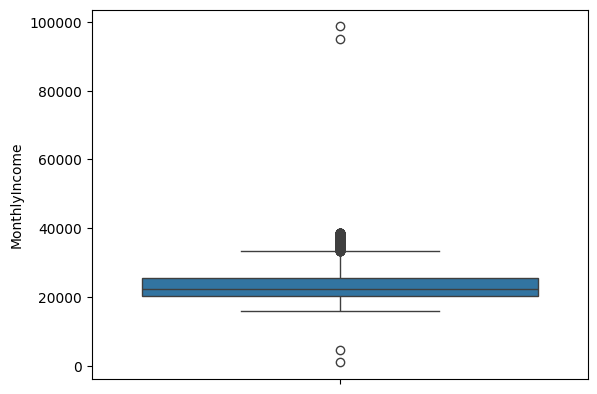

In [8]:
## As we saw in EDA there are outliers only in MonthlyIncome
sns.boxplot(data=data['MonthlyIncome'])

In [9]:
#column_name='MonthlyIncome'
def remove_outlier(data,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1
    
    lower_bound=q1-1.5*IQR
    upper_bound=q3 + 1.5*IQR
    
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
    
    return data

In [10]:
data=remove_outlier(data,'MonthlyIncome')

<Axes: ylabel='MonthlyIncome'>

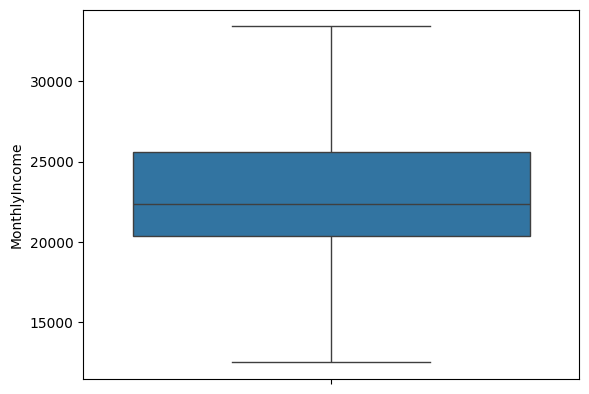

In [11]:
sns.boxplot(data=data['MonthlyIncome'])

In [12]:
data=data.drop('CustomerID',axis=1)

In [13]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### We had some values that were shown different but were same in our EDA

In [14]:
 data["MaritalStatus"]=np.where(data["MaritalStatus"]=="Single","Unmarried",data["MaritalStatus"])

In [15]:
data["Gender"]=np.where(data["Gender"]=="Fe Male","Female",data["Gender"])

## Model Training

In [16]:
X=data.drop(labels=["ProdTaken"],axis=1)

In [17]:
X.shape

(4888, 18)

In [18]:
y=data['ProdTaken']

In [19]:
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4888, dtype: int64

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [21]:
cat_features=X.select_dtypes(include="object").columns

In [22]:
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [23]:
num_features=X.select_dtypes(exclude="object").columns

In [24]:
num_features

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

### Creating PipeLines

In [25]:
num_pipeline=Pipeline(
     steps=[
         ("imputer",SimpleImputer()),
         ("Scaler",StandardScaler())
     ]
 
 )

In [26]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('Scaler', StandardScaler())])

In [27]:
cat_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("Encoding",OneHotEncoder())
    ]

)

In [28]:
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('Encoding', OneHotEncoder())])

In [29]:
preprocessor=ColumnTransformer(
    [
        ("num_pipeline",num_pipeline,num_features),
        ("cat_pipeline",cat_pipeline,cat_features)
    ]
)

In [30]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('Scaler', StandardScaler())]),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoding',
                                                  OneHotEncoder())]),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object'))])

### Train Test Split

In [31]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [32]:
preprocessor.fit_transform(X_train)

array([[ 1.16501812, -0.71403118, -0.667643  , ...,  0.        ,
         1.        ,  0.        ],
       [-0.82071167, -0.71403118, -0.54530796, ...,  0.        ,
         0.        ,  0.        ],
       [-0.93102999, -0.71403118, -0.17830285, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.0618349 ,  1.47085313,  1.53438769, ...,  0.        ,
         0.        ,  0.        ],
       [-1.04134831,  1.47085313,  1.77905777, ...,  1.        ,
         0.        ,  0.        ],
       [-1.70325824, -0.71403118, -0.78997804, ...,  0.        ,
         0.        ,  0.        ]])

In [33]:
preprocessor.transform(X_test)

array([[-0.60007503,  1.47085313,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.94438147,  0.37841098, -0.54530796, ...,  1.        ,
         0.        ,  0.        ],
       [-0.04848342,  1.47085313,  0.80037746, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.26912006, -0.71403118,  1.28971762, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.38565476, -0.71403118, -1.03464811, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.16501812, -0.71403118, -1.15698315, ...,  0.        ,
         0.        ,  0.        ]])

In [34]:
#preprocessor.get_feature_names_out(X_train)

In [35]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [36]:
X_train

,num_pipeline__Age,num_pipeline__CityTier,num_pipeline__DurationOfPitch,num_pipeline__NumberOfPersonVisiting,num_pipeline__NumberOfFollowups,num_pipeline__PreferredPropertyStar,num_pipeline__NumberOfTrips,num_pipeline__Passport,num_pipeline__PitchSatisfactionScore,num_pipeline__OwnCar,...,cat_pipeline__ProductPitched_Standard,cat_pipeline__ProductPitched_Super Deluxe,cat_pipeline__MaritalStatus_Divorced,cat_pipeline__MaritalStatus_Married,cat_pipeline__MaritalStatus_Unmarried,cat_pipeline__Designation_AVP,cat_pipeline__Designation_Executive,cat_pipeline__Designation_Manager,cat_pipeline__Designation_Senior Manager,cat_pipeline__Designation_VP
0,1.165018,-0.714031,-0.667643,0.128011,0.283040,-0.733171,-1.221546,-0.632714,1.409081,0.781435,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.820712,-0.714031,-0.545308,-1.262231,-0.717624,1.766376,1.501107,-0.632714,1.409081,-1.279697,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.931030,-0.714031,-0.178303,0.128011,1.283704,1.766376,-0.677015,1.580492,-0.046813,0.781435,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.931030,1.470853,-0.789978,0.128011,0.283040,0.516602,-0.132484,1.580492,-0.046813,0.781435,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.379438,-0.714031,-0.545308,0.128011,1.283704,0.516602,2.590169,-0.632714,0.681134,-1.279697,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,-1.041348,-0.714031,-0.667643,0.128011,1.283704,-0.733171,-0.677015,-0.632714,-1.502707,0.781435,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3417,0.392790,1.470853,-0.912313,0.128011,-0.717624,1.766376,-1.221546,-0.632714,1.409081,0.781435,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3418,0.061835,1.470853,1.534388,0.128011,0.283040,-0.733171,2.045638,-0.632714,-0.774760,0.781435,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3419,-1.041348,1.470853,1.779058,0.128011,1.283704,-0.733171,-0.132484,-0.632714,-1.502707,0.781435,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
X_test

,num_pipeline__Age,num_pipeline__CityTier,num_pipeline__DurationOfPitch,num_pipeline__NumberOfPersonVisiting,num_pipeline__NumberOfFollowups,num_pipeline__PreferredPropertyStar,num_pipeline__NumberOfTrips,num_pipeline__Passport,num_pipeline__PitchSatisfactionScore,num_pipeline__OwnCar,...,cat_pipeline__ProductPitched_Standard,cat_pipeline__ProductPitched_Super Deluxe,cat_pipeline__MaritalStatus_Divorced,cat_pipeline__MaritalStatus_Married,cat_pipeline__MaritalStatus_Unmarried,cat_pipeline__Designation_AVP,cat_pipeline__Designation_Executive,cat_pipeline__Designation_Manager,cat_pipeline__Designation_Senior Manager,cat_pipeline__Designation_VP
0,-0.600075,1.470853,0.000000,-1.262231,1.283704e+00,-0.733171,-1.221546,-0.632714,-0.774760,-1.279697,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.944381,0.378411,-0.545308,0.128011,4.443840e-16,0.516602,-1.221546,1.580492,1.409081,-1.279697,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.048483,1.470853,0.800377,0.128011,2.830399e-01,-0.733171,0.956577,-0.632714,1.409081,0.781435,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.613427,-0.714031,2.513068,0.128011,2.284368e+00,-0.733171,1.501107,-0.632714,-0.046813,0.781435,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-1.372303,1.470853,-1.034648,1.518253,2.830399e-01,0.516602,-0.132484,1.580492,0.681134,0.781435,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,2.378520,-0.714031,1.779058,1.518253,2.830399e-01,-0.733171,-0.132484,-0.632714,-0.046813,0.781435,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1463,0.392790,-0.714031,-0.789978,1.518253,2.830399e-01,-0.733171,0.412046,-0.632714,-1.502707,0.781435,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1464,-0.269120,-0.714031,1.289718,0.128011,2.830399e-01,0.516602,1.501107,-0.632714,-0.046813,0.781435,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1465,1.385655,-0.714031,-1.034648,0.128011,2.830399e-01,-0.733171,1.501107,-0.632714,-0.046813,0.781435,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Model Defining

In [38]:
models={
    "Logistic_regression":LogisticRegression(),
    "Random_Forest_Classifier":RandomForestClassifier(),
    "Decision_Tree_Classifier":DecisionTreeClassifier(),
    "XGBoost_Classifier": XGBClassifier(),
    "K_Neighbour_Classifier":KNeighborsClassifier(),
    "Naive_Bayes_Classifier":GaussianNB(),
    "SupportVectorClassifier":SVC(),
    "AdaBoost":AdaBoostClassifier()
}

In [39]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)

LogisticRegression()
RandomForestClassifier()
DecisionTreeClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
KNeighborsClassifier()
GaussianNB()
SVC()
AdaBoostClassifier()


In [40]:
models.keys()

dict_keys(['Logistic_regression', 'Random_Forest_Classifier', 'Decision_Tree_Classifier', 'XGBoost_Classifier', 'K_Neighbour_Classifier', 'Naive_Bayes_Classifier', 'SupportVectorClassifier', 'AdaBoost'])

In [41]:
def model_evaluation(dict_model,X_trained,y_trained,X_tested,y_tested):
    accuracy_report={}
    for i in range(len(list(models))):
        model=list(models.values())[i]
        model.fit(X_trained,y_trained)

        ## Making Predictions
        y_pred_train=model.predict(X_trained)
        y_pred_test=model.predict(X_tested)

        ## Classification Report
        train_report=classification_report(y_pred_train,y_trained)
        test_report=classification_report(y_pred_test,y_tested)

        ## Accuracy Score
        train_accuracy=round(accuracy_score(y_pred_train,y_trained),4)
        test_accuracy=round(accuracy_score(y_pred_test,y_tested),4)

        print("Model Training Performance")
        print("Models:",model)
        print(f"Accuracy score for training data of {model} = {train_accuracy}")
        print(train_report)
        print("--"*40)
        print(f"Accuracy score for testing data of {model} = {test_accuracy}")
        print(test_report)
        accuracy_report[model] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}
    return accuracy_report
        




In [42]:
report=model_evaluation(models,X_train,y_train,X_test,y_test)

Model Training Performance
Models: LogisticRegression()
Accuracy score for training data of LogisticRegression() = 0.8454
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3138
           1       0.31      0.71      0.43       283

    accuracy                           0.85      3421
   macro avg       0.64      0.78      0.67      3421
weighted avg       0.92      0.85      0.87      3421

--------------------------------------------------------------------------------
Accuracy score for testing data of LogisticRegression() = 0.8398
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1340
           1       0.30      0.65      0.41       127

    accuracy                           0.84      1467
   macro avg       0.63      0.76      0.66      1467
weighted avg       0.91      0.84      0.86      1467

Model Training Performance
Models: RandomForestClassifier()
Accuracy score for

In [43]:
report

{LogisticRegression(): {'train_accuracy': 0.8454, 'test_accuracy': 0.8398},
 RandomForestClassifier(): {'train_accuracy': 1.0, 'test_accuracy': 0.9134},
 DecisionTreeClassifier(): {'train_accuracy': 1.0, 'test_accuracy': 0.908},
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...): {

In [44]:
model_score=pd.DataFrame({
    "Models":list(models),
    "Scores":report.values()
})

In [45]:
model_score

,Models,Scores
0,Logistic_regression,"{'train_accuracy': 0.8454, 'test_accuracy': 0...."
1,Random_Forest_Classifier,"{'train_accuracy': 1.0, 'test_accuracy': 0.9134}"
2,Decision_Tree_Classifier,"{'train_accuracy': 1.0, 'test_accuracy': 0.908}"
3,XGBoost_Classifier,"{'train_accuracy': 0.9997, 'test_accuracy': 0...."
4,K_Neighbour_Classifier,"{'train_accuracy': 0.9348, 'test_accuracy': 0...."
5,Naive_Bayes_Classifier,"{'train_accuracy': 0.8179, 'test_accuracy': 0...."
6,SupportVectorClassifier,"{'train_accuracy': 0.8971, 'test_accuracy': 0...."
7,AdaBoost,"{'train_accuracy': 0.853, 'test_accuracy': 0.8..."


In [56]:
model_score_df = pd.DataFrame(list(report.items()), columns=['Models', 'Scores'])

# Expand the 'Scores' column into individual columns
model_score_df = pd.concat([model_score_df, pd.json_normalize(model_score_df['Scores'])], axis=1)

# Drop the original 'Scores' column
model_score_df = model_score_df.drop(columns=['Scores'])

In [58]:
model_score_df.sort_values(by='test_accuracy', ascending=False)

,Models,train_accuracy,test_accuracy
3,"XGBClassifier(base_score=None, booster=None, c...",0.9997,0.9250
1,"(DecisionTreeClassifier(max_features='sqrt', r...",1.0000,0.9134
2,DecisionTreeClassifier(),1.0000,0.9080
4,KNeighborsClassifier(),0.9348,0.8889
6,SVC(),0.8971,0.8739
0,LogisticRegression(),0.8454,0.8398
7,"(DecisionTreeClassifier(max_depth=1, random_st...",0.8530,0.8378
5,GaussianNB(),0.8179,0.8194
